### Student Information
Name: Kittiphoom Treesam(喆桑)

Student ID:111072281

GitHub ID: Peter-2002

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [108]:
### Cell 0 — Begin Assignment Here (imports + load)
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')  # download tokenizer if needed

from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import math

# optional helper functions (from Master)
import helpers.data_mining_helpers as dmh

# load dataset (adjust path if needed)
df = pd.read_csv("Reddit-stock-sentiment.csv")
print("Loaded:", df.shape)


Loaded: (847, 16)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kittiphoomtreesam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [109]:
#Exercise 1
for i in range(3):
    print(f"Example {i+1}")
    print("\n".join(str(df.loc[i, 'text']).split("\n")))


Example 1
Calls on retards
Example 2
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
Example 3
Seeing lots of red in the ticker.


In [110]:
#Exercise 2
### Cell 2 — Exercise 2: Show columns of interest and drop unneeded features
# show text and label columns
display(df[["text", "label"]].head())

# drop columns that are not significant (ignore if they don't exist)
feature_deletion = ["datetime", "post_id", "url", "author", "subreddit"]
df = df.drop(columns=feature_deletion, errors='ignore')
print("Remaining columns:", df.columns.tolist())


,text,label
0,Calls on retards,-1.0
1,Stunt as in like why did they even make a big ...,0.0
2,Seeing lots of red in the ticker.,0.0
3,Vision Marine Technologies Inc. is rewriting t...,1.0
4,He didn’t say thank you.,-1.0


Remaining columns: ['type', 'title', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']


In [111]:
#Exercise 3
if 'label' in df.columns:
    display(df[df["label"] == 1.0][::10].head(5))
else:
    print("No 'label' column found.")


,type,title,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
3,post,Who knows more? $VMAR,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
78,comment,$ U.S. dollar value (crashing),1,NaN,NaN,I think it’s gonna work itself out. I bought t...,0.133333,-0.133333,-1.0,"['trading', 'app', 'gloom', 'doom', 'gon']",1.0
168,comment,r/Stocks Daily Discussion & Fundamentals Frida...,1,NaN,NaN,The obvious can also be refreshing from CNBC: ...,0.750000,0.250000,1.0,"['bond', 'U.S', 'dollar', '’', 'Fed', 'CNBC', ...",1.0
219,comment,APLS stocks,1,NaN,NaN,Same. Back to break even after that last rip b...,0.300000,0.144444,1.0,"['rip', 'Same', 'Back', '%', 'thing']",1.0
319,comment,"It's fucking awful seeing the ""Silver"" misinfo...",1,NaN,NaN,Etrade has a feed of news articles about how r...,0.000000,0.000000,0.0,"['news', 'actual-reddit', 'reddit', 'GME', 'Et...",1.0


In [112]:
#Exercise 3
### Cell 3 — Exercise 3: Show some positive examples (every 10th)
# show 5 positive examples sampled every 10 rows (if present)
if 'label' in df.columns:
    display(df[df["label"] == 1.0][::10].head(5))
else:
    print("No 'label' column found.")


,type,title,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
3,post,Who knows more? $VMAR,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
78,comment,$ U.S. dollar value (crashing),1,NaN,NaN,I think it’s gonna work itself out. I bought t...,0.133333,-0.133333,-1.0,"['trading', 'app', 'gloom', 'doom', 'gon']",1.0
168,comment,r/Stocks Daily Discussion & Fundamentals Frida...,1,NaN,NaN,The obvious can also be refreshing from CNBC: ...,0.750000,0.250000,1.0,"['bond', 'U.S', 'dollar', '’', 'Fed', 'CNBC', ...",1.0
219,comment,APLS stocks,1,NaN,NaN,Same. Back to break even after that last rip b...,0.300000,0.144444,1.0,"['rip', 'Same', 'Back', '%', 'thing']",1.0
319,comment,"It's fucking awful seeing the ""Silver"" misinfo...",1,NaN,NaN,Etrade has a feed of news articles about how r...,0.000000,0.000000,0.0,"['news', 'actual-reddit', 'reddit', 'GME', 'Et...",1.0


In [113]:
#Create sentiment_label column (mapping)
def format_labels(target):
    try:
        if float(target) == 1.0:
            return "positive"
        elif float(target) == 0.0:
            return "neutral"
        elif float(target) == -1.0:
            return "negative"
    except:
        return "unknown"

df['sentiment_label'] = df['label'].apply(format_labels)
print(df['sentiment_label'].value_counts(dropna=False))


neutral     423
negative    315
positive    109
Name: sentiment_label, dtype: int64


In [114]:
#Exercise 4
print("Missing by column:")
print(df.isnull().sum())

# missing per record using helper (same idea as Master)
print("\nMissing per record (sample):")
print(df.isnull().apply(lambda x: dmh.check_missing_values(x)).head())


Missing by column:
type                 0
title                0
upvotes              0
downvotes          783
upvote_ratio       783
text                 0
subjectivity         0
polarity             0
sentiment            0
entities             0
label                0
sentiment_label      0
dtype: int64

Missing per record (sample):
                                 type                               title  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                              upvotes                           downvotes  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                 783   

                         upvote_ratio                                text  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                 783       

In [115]:
#Drop rows with nulls
df_dropna = df.dropna().reset_index(drop=True)
print("After dropna:", df_dropna.shape)
# keep using df_dropna for subsequent processing (or keep df if you prefer)
df = df_dropna.copy()


After dropna: (64, 12)


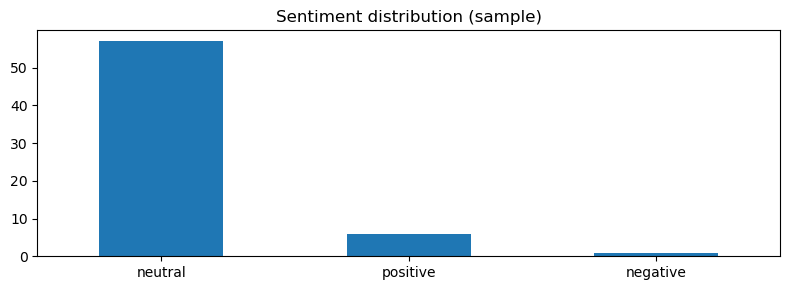

In [116]:
#Exercise 6 and 7 Sample and plot sentiment distribution
# create X and a sample X_sample similar to Master
X = df[['text', 'sentiment_label']].copy()
sample_n = min(1000, len(X))
X_sample = X.sample(n=sample_n, random_state=42) if sample_n > 0 else X.copy()

plt.figure(figsize=(8,3))
X_sample['sentiment_label'].value_counts().plot(kind='bar',
                                               title='Sentiment distribution (sample)',
                                               rot=0)
plt.tight_layout()
plt.show()

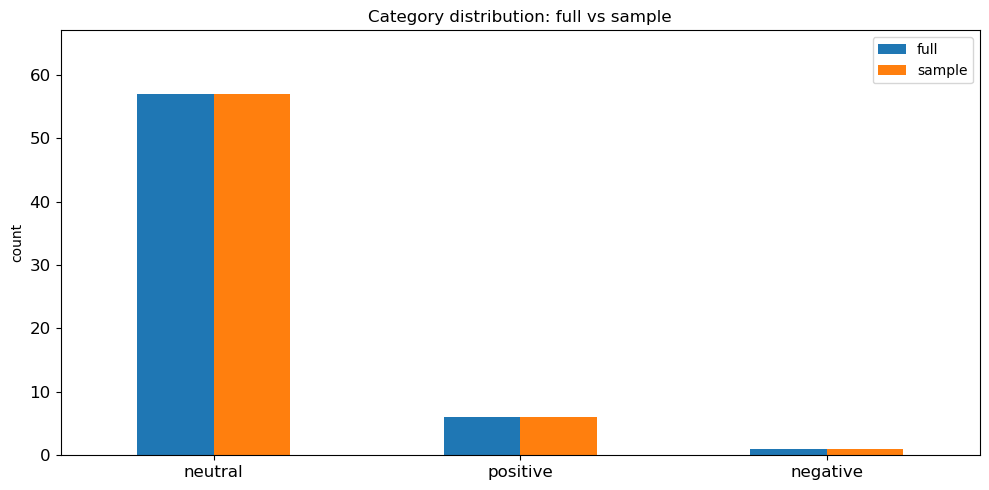

In [117]:
#Exercise 8 Compare full vs sample counts
counts_full = X['sentiment_label'].value_counts()
counts_sample = X_sample['sentiment_label'].value_counts().reindex(counts_full.index, fill_value=0)
df_counts = pd.concat([counts_full, counts_sample], axis=1)
df_counts.columns = ['full', 'sample']

ax = df_counts.plot(kind='bar', figsize=(10,5), rot=0, fontsize=12, title='Category distribution: full vs sample')
ax.set_ylabel('count')
ax.set_ylim(0, df_counts.values.max() + 10)
ax.legend(['full','sample'])
plt.tight_layout()
plt.show()


In [118]:
#Exercise 9 Tokenization demo using CountVectorizer.build_analyzer()
count_vect = CountVectorizer(stop_words='english', min_df=2)
analyzer = count_vect.build_analyzer()
example_text = X['text'].astype(str).iloc[0]
print("First 50 tokens from analyzer for doc 0:")
print(analyzer(example_text)[:50])


First 50 tokens from analyzer for doc 0:
['vision', 'marine', 'technologies', 'rewriting', 'watercraft', 'rulebook', 'collaboration', 'shaun', 'torrente', 'achieved', 'unthinkable', 'blazing', '116', 'mph', 'water', 'isn', 'just', 'speed', 'propelling', 'electric', 'boating', 'new', 'era', 'cutting', 'edge', 'technology', 'combined', 'torrente', 'skill', 'making', 'waves', 'll', 'ripple', 'generations', 'highlight', 'main', 'points', 'vision', 'marine', 'technologies', 'achieves', 'record', 'breaking', '116', 'mph', 'speed', 'water', 'shaun', 'torrente', 'feat']


In [119]:
#Exercise 10 Fit CountVectorizer and inspect one document's non-zero tokens
X_counts = count_vect.fit_transform(X['text'].astype(str))
feature_names = count_vect.get_feature_names_out()
doc_index = 4 if X_counts.shape[0] > 4 else 0
word_indices = X_counts[doc_index].nonzero()[1]
words = [feature_names[i] for i in word_indices]
print(f"Non-zero words in document {doc_index} (first 200 shown):\n{words[:200]}")


Non-zero words in document 4 (first 200 shown):
['like', 'stocks', 'using', 'don', 'investing', 'lot', 'right', 'thoughts', 'nvidia', 'think', 'advice', 'lmk', 'invest', 'crypto', 'time', 'young', 'want', 'money', '500']


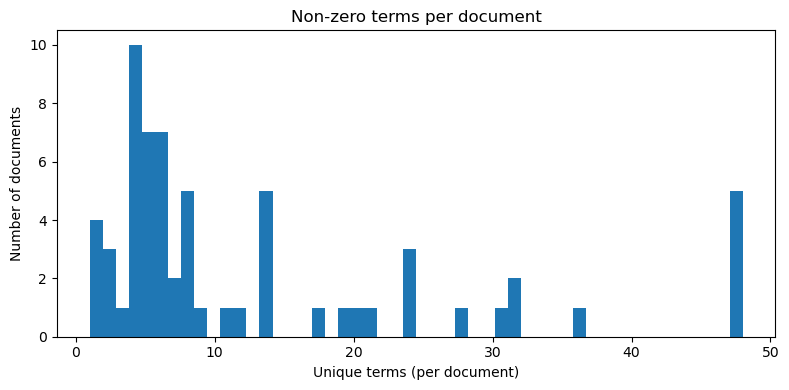

Stats: mean, median, max: 13.03125 6.5 48


In [120]:
#Exercise 11 Sparsity / Non-zero distribution per document (histogram)
X_nonzero_per_doc = (X_counts > 0).sum(axis=1).A1
plt.figure(figsize=(8,4))
plt.hist(X_nonzero_per_doc, bins=50)
plt.title("Non-zero terms per document")
plt.xlabel("Unique terms (per document)")
plt.ylabel("Number of documents")
plt.tight_layout()
plt.show()

print("Stats: mean, median, max:", np.mean(X_nonzero_per_doc), np.median(X_nonzero_per_doc), np.max(X_nonzero_per_doc))


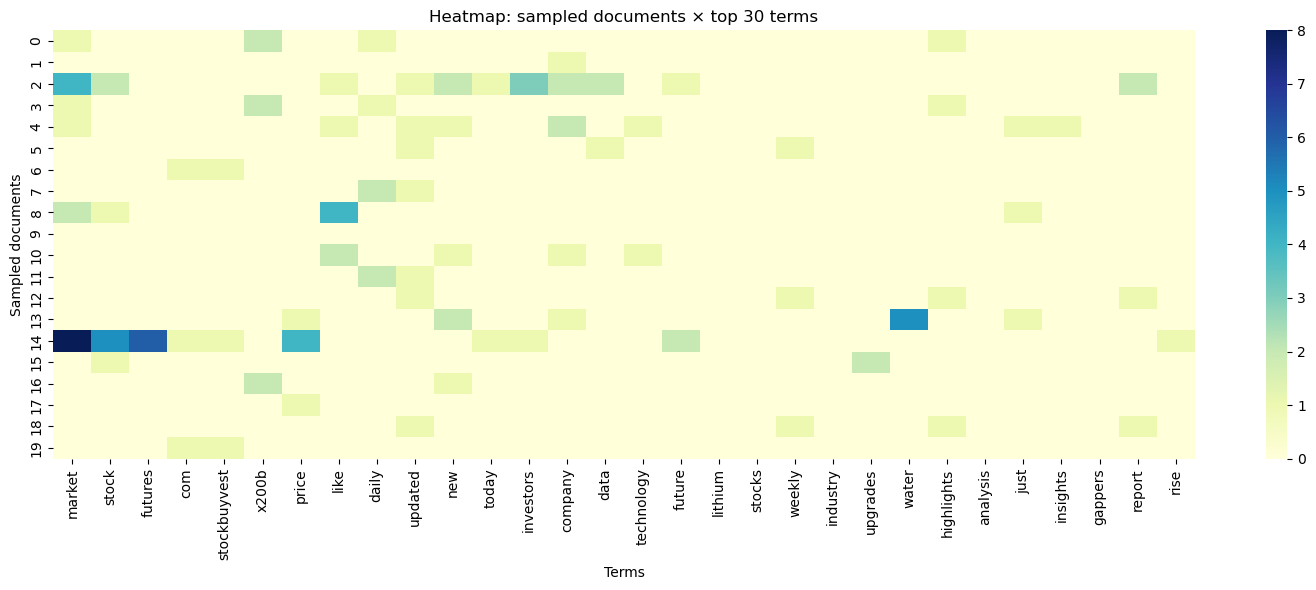

In [121]:
#Exercise 12 Term-Document matrix sample & heatmap (dense only on small sample)
n_docs_sample = min(20, X_counts.shape[0])
docs_idx = np.random.choice(X_counts.shape[0], size=n_docs_sample, replace=False)
term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()
top_terms_idx = np.argsort(term_frequencies)[::-1][:30]
tdm_sample = X_counts[docs_idx][:, top_terms_idx].toarray()
df_tdm_sample = pd.DataFrame(tdm_sample, columns=feature_names[top_terms_idx])

plt.figure(figsize=(15,6))
sns.heatmap(df_tdm_sample, cmap='YlGnBu', cbar=True)
plt.title("Heatmap: sampled documents × top 30 terms")
plt.xlabel("Terms")
plt.ylabel("Sampled documents")
plt.tight_layout()
plt.show()

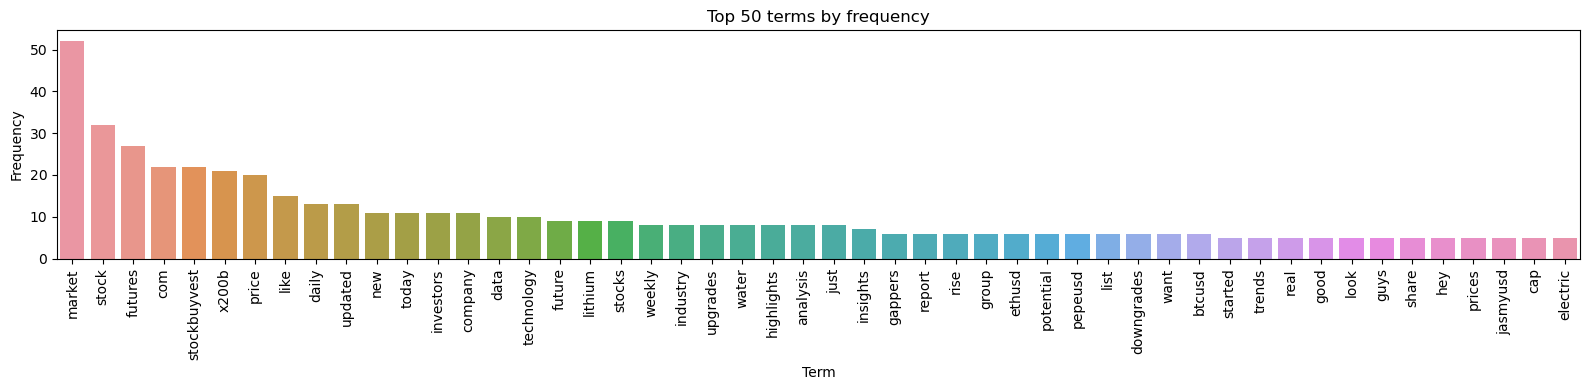

In [122]:
#Exercise 13 Reduce number of terms for plotting (top-k)
top_k = 50
top_k_idx = np.argsort(term_frequencies)[::-1][:top_k]
top_k_terms = feature_names[top_k_idx]
top_k_counts = term_frequencies[top_k_idx]

plt.figure(figsize=(16,4))
sns.barplot(x=top_k_terms, y=top_k_counts)
plt.xticks(rotation=90)
plt.title(f"Top {top_k} terms by frequency")
plt.xlabel("Term")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


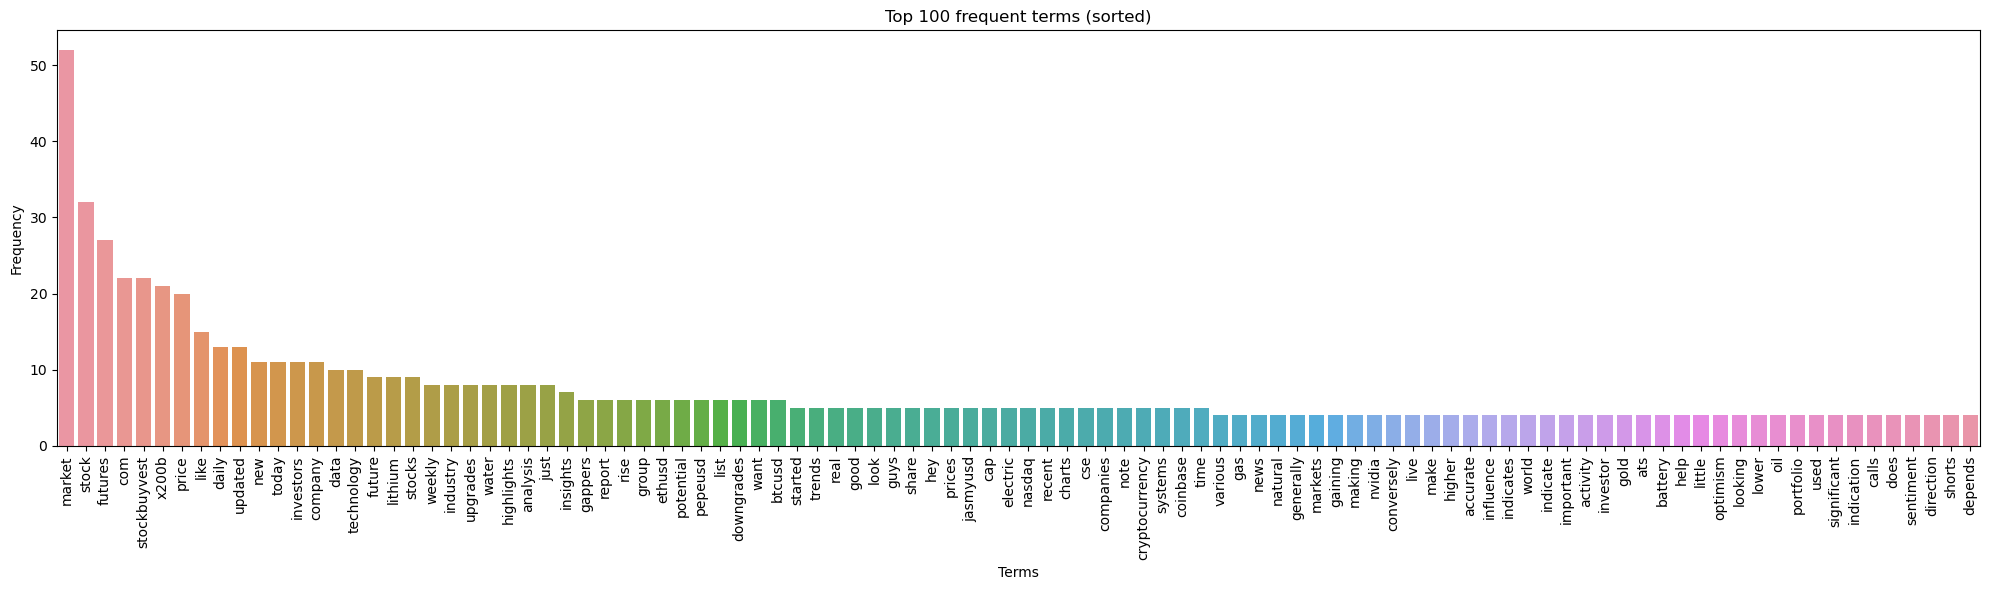

In [123]:
#Exercise 14 Sort by frequency and plot many terms (top N)
top_n = min(100, len(feature_names))
sorted_idx = np.argsort(term_frequencies)[::-1][:top_n]
sorted_terms = feature_names[sorted_idx]
sorted_freqs = term_frequencies[sorted_idx]

plt.figure(figsize=(20,6))
sns.barplot(x=sorted_terms, y=sorted_freqs)
plt.xticks(rotation=90)
plt.title(f"Top {top_n} frequent terms (sorted)")
plt.xlabel("Terms")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


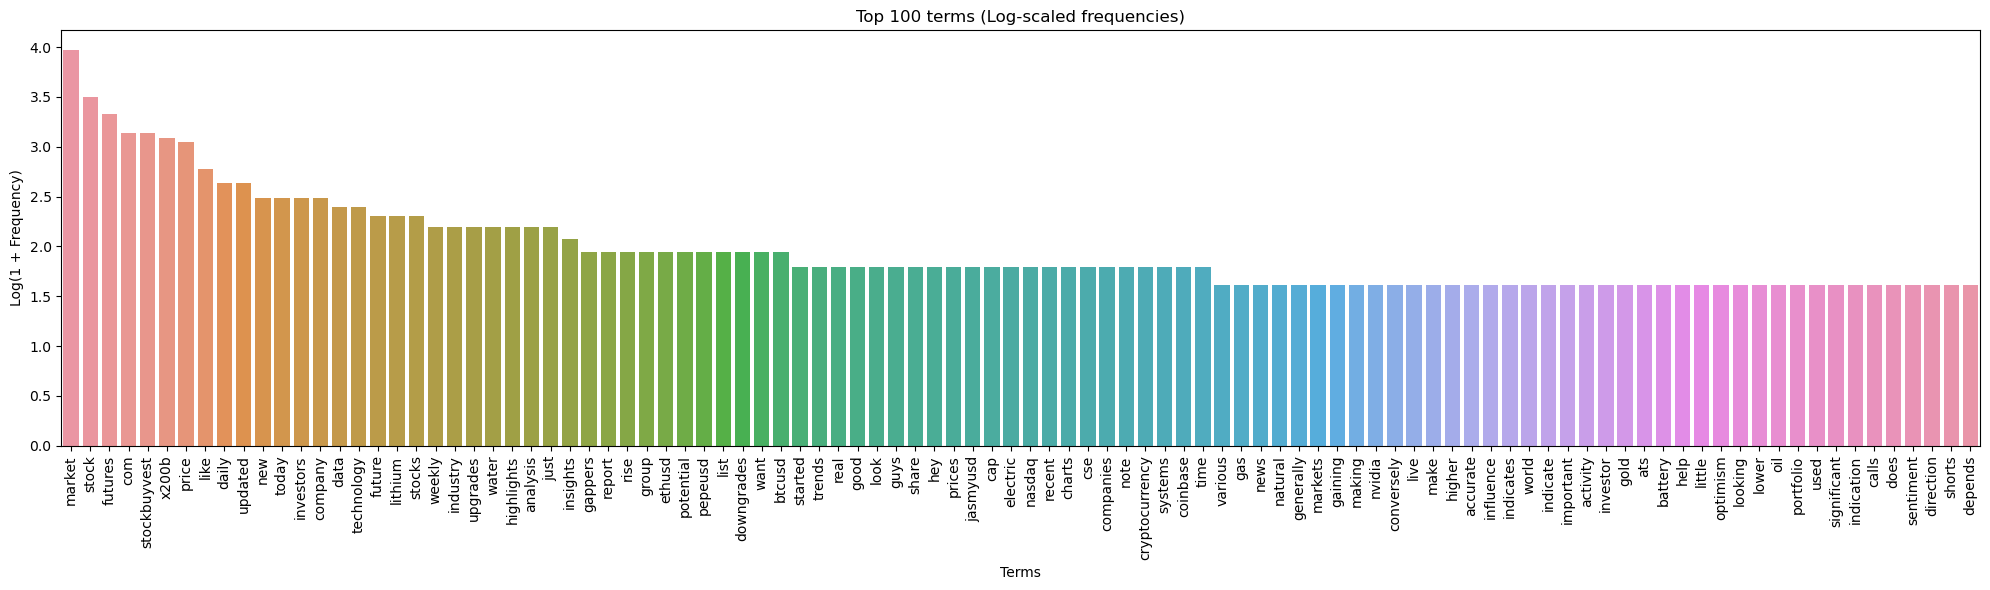

In [ ]:
### Cell 15 Log-scaled frequency plot
term_frequencies_log = np.log1p(term_frequencies)
sorted_idx_log = np.argsort(term_frequencies_log)[::-1][:top_n]
sorted_terms_log = feature_names[sorted_idx_log]
sorted_freqs_log = term_frequencies_log[sorted_idx_log]

plt.figure(figsize=(20,6))
sns.barplot(x=sorted_terms_log, y=sorted_freqs_log)
plt.xticks(rotation=90)
plt.title(f"Top {top_n} terms (Log-scaled frequencies)")
plt.xlabel("Terms")
plt.ylabel("Log(1 + Frequency)")
plt.tight_layout()
plt.show()


# Phase 2

In [125]:
### Begin Assignment Here